# Types

Every object in Julia has a type that can be accessed with `typeof`.

### Integers

In [ ]:
1

In [ ]:
typeof(1)

The default system integer type is aliased to `Int`. On my 64-bit machine, it is an `Int64`

In [ ]:
Int

### Floating point numbers

By default, real numbers are represented by 64-bit "double precision" IEEE standard floating point numbers (the same as `double` in C). Literals are written with a decimal point:

In [ ]:
2.0 + 4.0

In [ ]:
typeof(2.0)

You can also use "single precision" 32-bit floating point numbers. with an `f0` at the end.

In [ ]:
typeof(2.0f0)

### Rationals

In [ ]:
332//241

In [ ]:
332//241 - 235//128

### Strings

In [ ]:
"Life is a POMDP"

# Type Conversion

In [ ]:
convert(Float64, 1)

# Variables

Variables are names assigned to objects.

In [12]:
a = 1

1

In [13]:
b = a
a = 5
b

1

In [14]:
a + b

6

A variable does not have a type - only the object that it refers to has a type.

In [15]:
c = 1
typeof(c)

Int64

In [16]:
c = 3.2
typeof(c)

Float64

# Arrays

In [17]:
v = [1,2,3]

3-element Vector{Int64}:
 1
 2
 3

In [18]:
push!(v, 4)

4-element Vector{Int64}:
 1
 2
 3
 4

The type in the curly brackets indicates what kind of objects the vector can contain. 

In [19]:
push!(v, "string")

LoadError: MethodError: [0mCannot `convert` an object of type [92mString[39m[0m to an object of type [91mInt64[39m

[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::T[39m) where T<:Number
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:6[24m[39m
[0m  convert(::Type{T}, [91m::T[39m) where T
[0m[90m   @[39m [90mBase[39m [90m[4mBase.jl:84[24m[39m
[0m  convert(::Type{T}, [91m::Number[39m) where T<:Number
[0m[90m   @[39m [90mBase[39m [90m[4mnumber.jl:7[24m[39m
[0m  ...


`Vector{Any}` objects can contain any type of object, but they are less efficient.

In [20]:
Any[1, 2.0, "three"]

3-element Vector{Any}:
 1
 2.0
  "three"

`Array`s can even contain other `Array`s.

In [21]:
[[1, 2], [3,4]]

2-element Vector{Vector{Int64}}:
 [1, 2]
 [3, 4]

### Indexing

In [22]:
v[1]

1

In [23]:
v[1] = 5
v

4-element Vector{Int64}:
 5
 2
 3
 4

### Vectors and Matrices

A `Vector` is a one-dimensional `Array`. They are written with comma-separated values.

This is in contrast to Matlab, where vectors are usually represented as $n \times 1$ 2-dimensional arrays. In Matlab, the distinction between row vectors and column vectors is a primary concern, it is not usually a concern in Julia.

In [24]:
typeof([1.0, 2.0])

Vector{Float64} (alias for Array{Float64, 1})

In [25]:
size([1.0, 2.0])

(2,)

A `Matrix` is a two-dimensional `Array`. They are written with spaces and semicolons.

In [26]:
m = [1 2; 3 4]

2×2 Matrix{Int64}:
 1  2
 3  4

In [27]:
typeof(m)

Matrix{Int64} (alias for Array{Int64, 2})

In [28]:
size(m)

(2, 2)

# Mutable and Immutable Types

Some types, such as `Int` and `Float64` are immutable - that means the objects themselves can never be modified. Other types, such as `Vector` are mutable and the objects can be modified.

In [29]:
a = 1
b = a
a += 1 # identical to a = a + 1
a, b

(2, 1)

In [30]:
v = [1,2]
u = v
u[1] = 5
u, v

([5, 2], [5, 2])

Convention: functions with `!` (pronounced "bang") modify their arguments

In [31]:
a = [1,2]
push!(a, 3)
a

3-element Vector{Int64}:
 1
 2
 3

Two important immutable types are `Tuple`s and `StaticArray`s.

`Tuple`s are immutable collections of a few objects that can each have a different type without performanc penalties. Literals representing `Tuple`s are surrounded by parentheses with items separated by commas.

In [32]:
typeof((1,"two"))

Tuple{Int64, String}

`StaticArray`s come from the `StaticArrays.jl` package. They are immutable, have fixed size, and are useful for representing small arrays (like x-y position) in performance-critical code. The easiest way to construct one is by preceding an array literal with `SA`:

In [34]:
using StaticArrays
SA[1,2,3]

3-element SVector{3, Int64} with indices SOneTo(3):
 1
 2
 3

# Dictionaries

Dictionaries map keys to values.

In [60]:
d = Dict("one" => 1, "two" => 2)

Dict{String, Int64} with 2 entries:
  "two" => 2
  "one" => 1

In [63]:
d["two"]

2

In [65]:
d["three"]

LoadError: KeyError: key "three" not found

In [68]:
d["three"] = 3
d

Dict{String, Int64} with 3 entries:
  "two"   => 2
  "one"   => 1
  "three" => 3

# Debugging

## Printline Debugging

In [35]:
a = [1,2,3]
@show a # Things that begin with "@", like @show, are "macros"
a + a

a = [1, 2, 3]


3-element Vector{Int64}:
 2
 4
 6

In [36]:
a = [1,2,3]
display(a)
a + a

3-element Vector{Int64}:
 1
 2
 3

3-element Vector{Int64}:
 2
 4
 6

In [37]:
a = [1,2,3]
@debug("debug doesn't print by default", a)
@info("some info", a)
@warn("a warning", a)
@error("an error message (with no exception)", a)

┌ Info: some info
│   a =
│    3-element Vector{Int64}:
│     1
│     2
└     3
┌ Warning: a warning
│   a =
│    3-element Vector{Int64}:
│     1
│     2
│     3
└ @ Main In[37]:4
┌ Error: an error message (with no exception)
│   a =
│    3-element Vector{Int64}:
│     1
│     2
│     3
└ @ Main In[37]:5


In [38]:
using Logging
debuglogger = ConsoleLogger(stderr, Logging.Debug)
with_logger(debuglogger) do
    @debug("this debug message will print")
end

┌ Debug: this debug message will print
└ @ Main In[38]:4


## Debugger

In [40]:
using Debugger

@enter sin(2)

LoadError: Debugger.jl needs to be run in a Julia REPL

# Functions

In [41]:
function f(x)
    return x^2
end

f (generic function with 1 method)

In [42]:
f(x) = x^2

f (generic function with 1 method)

In [43]:
f(2.0)

4.0

In [44]:
g = x -> x^2

#3 (generic function with 1 method)

In [45]:
g(2.0)

4.0

### Methods and multiple dispatch

In [46]:
function f(x::Float64)
    println("A float!")
    return x^2
end

f (generic function with 2 methods)

In [47]:
function f(x::Int)
    println("An int!")
    return x^2
end

f (generic function with 3 methods)

In [48]:
f(1)

An int!


1

In [49]:
f(2.0)

A float!


4.0

In [50]:
f("three")

"threethree"

In [51]:
methods(f)

# 3 methods for generic function "f" from Main:
 [1] f(x::Int64)
     @ In[47]:1
 [2] f(x::Float64)
     @ In[46]:1
 [3] f(x)
     @ In[42]:1

# Plotting

In [52]:
using Plots # the first time this will be slow because it's compiling

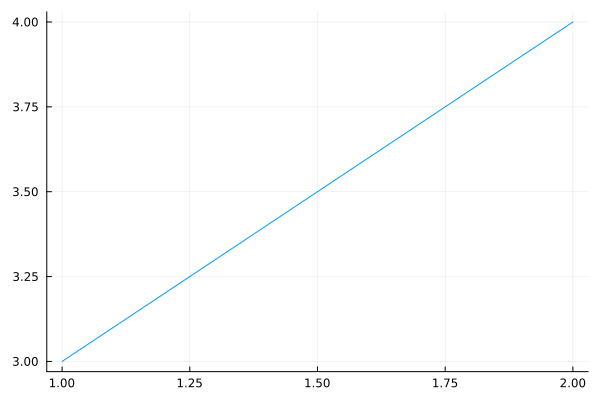

In [53]:
plot([1,2], [3,4], label=nothing) # also slow the first time

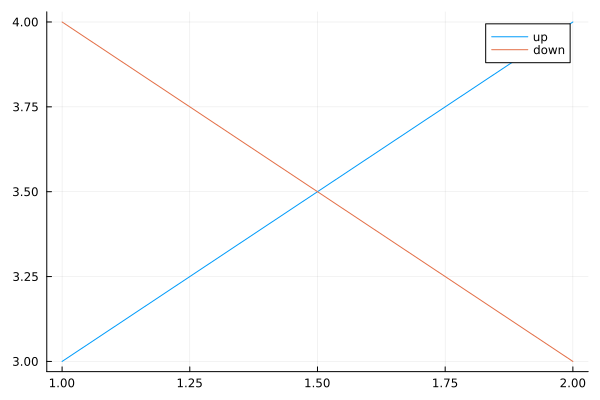

In [54]:
plot([1,2], [3,4], label="up")
plot!([1,2], [4,3], label="down") # plot! adds another plot

# Type stability

You want to make it easy for the compiler to predict what your function will return.

In [55]:
function good()
    if rand() > 0.5
        return sqrt(2.0)
    else
        return 0.0
    end
end

good (generic function with 1 method)

In [56]:
function bad()
    if rand() > 0.5
        return sqrt(2.0)
    else
        return 0
    end
end

bad (generic function with 1 method)

In [57]:
@code_warntype bad()

MethodInstance for bad()
  from bad() @ Main In[56]:1
Arguments
  #self#::Core.Const(bad)
Body::Union{Float64, Int64}
1 ─ %1 = Main.rand()::Float64
│   %2 = (%1 > 0.5)::Bool
└──      goto #3 if not %2
2 ─ %4 = Main.sqrt(2.0)::Core.Const(1.4142135623730951)
└──      return %4
3 ─      return 0



In [58]:
@code_warntype good()

MethodInstance for good()
  from good() @ Main In[55]:1
Arguments
  #self#::Core.Const(good)
Body::Float64
1 ─ %1 = Main.rand()::Float64
│   %2 = (%1 > 0.5)::Bool
└──      goto #3 if not %2
2 ─ %4 = Main.sqrt(2.0)::Core.Const(1.4142135623730951)
└──      return %4
3 ─      return 0.0

